In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,TimeSeriesSplit
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
import numpy as np
import datetime as dt
import cbpro
import matplotlib.pyplot as plt 
import time
from web3.middleware import geth_poa_middleware
from web3.gas_strategies.time_based import medium_gas_price_strategy
from eth_account.messages import encode_defunct

from web3 import Web3, constants
from web3 import middleware
# from flask import Flask, flash, request, redirect, url_for, render_template
# from werkzeug.utils import secure_filename
import json
import librosa
infura_url = "https://mainnet.infura.io/v3/5c9cb0b35a2742659dec6fc7680c16c4"
web3 = Web3(Web3.HTTPProvider(infura_url))
web3.middleware_onion.inject(geth_poa_middleware, layer=0)

# address = '0x1A0F33bBc5c7bA83f490cdB6C13ee50e1C851908'
# abi = '[{"inputs":[{"internalType":"string","name":"_name","type":"string"},{"internalType":"string","name":"_symbol","type":"string"},{"internalType":"string","name":"_initBaseURI","type":"string"},{"internalType":"string","name":"_initNotRevealedUri","type":"string"}],"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"","type":"address"},{"indexed":false,"internalType":"uint256","name":"","type":"uint256"}],"name":"AddressCalled","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address[]","name":"","type":"address[]"}],"name":"AddressesAdded","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"address","name":"approved","type":"address"},{"indexed":true,"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"owner","type":"address"},{"indexed":true,"internalType":"address","name":"operator","type":"address"},{"indexed":false,"internalType":"bool","name":"approved","type":"bool"}],"name":"ApprovalForAll","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"previousOwner","type":"address"},{"indexed":true,"internalType":"address","name":"newOwner","type":"address"}],"name":"OwnershipTransferred","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":true,"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"Transfer","type":"event"},{"inputs":[],"name":"PRICE","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"_mintSingleNFT1","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"addressMintedBalance","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"approve","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"owner","type":"address"}],"name":"balanceOf","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"baseExtension","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"baseURI","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_count","type":"uint256"}],"name":"claimTauros","outputs":[],"stateMutability":"payable","type":"function"},{"inputs":[{"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"getApproved","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getCurrentToken","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"owner","type":"address"},{"internalType":"address","name":"operator","type":"address"}],"name":"isApprovedForAll","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"maxMintAmount","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"maxSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"name","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"notRevealedUri","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"owner","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"ownerOf","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"bool","name":"_state","type":"bool"}],"name":"pause","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"paused","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"renounceOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"reserveNFTs","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"reveal","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"revealed","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"safeTransferFrom","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"tokenId","type":"uint256"},{"internalType":"bytes","name":"data","type":"bytes"}],"name":"safeTransferFrom","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"operator","type":"address"},{"internalType":"bool","name":"approved","type":"bool"}],"name":"setApprovalForAll","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"string","name":"_newBaseExtension","type":"string"}],"name":"setBaseExtension","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"string","name":"_newBaseURI","type":"string"}],"name":"setBaseURI","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"string","name":"_notRevealedURI","type":"string"}],"name":"setNotRevealedURI","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"_newPRICE","type":"uint256"}],"name":"setPRICE","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"_newmaxMintAmount","type":"uint256"}],"name":"setmaxMintAmount","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"bytes4","name":"interfaceId","type":"bytes4"}],"name":"supportsInterface","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"symbol","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"index","type":"uint256"}],"name":"tokenByIndex","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"","type":"uint256"}],"name":"tokenId","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"owner","type":"address"},{"internalType":"uint256","name":"index","type":"uint256"}],"name":"tokenOfOwnerByIndex","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_Id","type":"uint256"}],"name":"tokenURI","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalSupply","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"tokenId","type":"uint256"}],"name":"transferFrom","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"newOwner","type":"address"}],"name":"transferOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_owner","type":"address"}],"name":"walletOfOwner","outputs":[{"internalType":"uint256[]","name":"","type":"uint256[]"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"withdraw","outputs":[],"stateMutability":"payable","type":"function"}]'
# abi = json.loads(abi)
# mint_acct ='Enter Address'


# web3.eth.mint_acct = mint_acct
# mint_key = 'Enter Private Key'
# nonce =  web3.eth.getTransactionCount(mint_acct)
# contract = web3.eth.contract(address=address, abi=abi)


# withdraw = contract.functions.withdraw().buildTransaction({'chainId': 1,'gas':250000,'gasPrice': web3.toWei('32.875000015', 'gwei'), 'nonce': nonce})
# signed_tx2 = web3.eth.account.signTransaction(withdraw, mint_key)
# latestBlock()
# tx_hash = web3.eth.sendRawTransaction(signed_tx2.rawTransaction)
# print("withdrawing")
# tx_hash2 = web3.toHex(tx_hash)
# print(tx_hash2)
# web3.eth.waitForTransactionReceipt(tx_hash2)

## Transfer to CB-pro Address AS ETH to allow the machine learning model to trade.. will integrate LSTM as staking contract accumulates liquidity overtime , more liquidity ?

# result = web3.eth.getBalance(mint_acct) 
# result = web3.fromWei(result,'ether')
# print(result)

# cb_address = 'ENTER CB-PRO _ ETHEREUM ADDRESS FOR AI TRADING'


# tx = {
#     'nonce': nonce,
#     'to': cb_address,
#     'value': web3.toWei(.5, 'ether'),
#     'gas': 250000,
#     'gasPrice': web3.toWei('50', 'gwei')
# }

##sign the transaction
# signed_tx = web3.eth.account.sign_transaction(tx, mint_key)

# #send transaction
# tx_hash = web3.eth.sendRawTransaction(signed_tx.rawTransaction)



apiKey = "###"
apiSecret = "###"
passphrase = "###"

auth_client = cbpro.AuthenticatedClient(apiKey,apiSecret,passphrase)
auth_client_df = pd.DataFrame(auth_client.get_accounts()) 



In [4]:
def latestBlock():
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    web3.eth.getBlock('latest')
    a = web3.eth.getBlock('latest')
    time.sleep(300)
    return a
def current_price(currency):
    currency = currency
    Period = 60 #[60, 300, 900, 3600, 21600, 86400]
    historicData = auth_client.get_product_historic_rates(currency, granularity=Period)
    #     print(historicData)
            # Make an array of the historic price data from the matrix
    price = np.squeeze(np.asarray(np.matrix(historicData)[:,4]))
            # Wait for 1 second, to avoid API limit
    time.sleep(1)
            # Get latest data and show to the user for reference
    newData = auth_client.get_product_ticker(product_id=currency)
    currentPrice=newData['price']
    print('currency: {}'.format(currency))
    print('current_price {} \n\n'.format(currentPrice))
#     currentPrice2=client.get_buy_price(currency_pair = currency)
    
#     print('currency: {}'.format(currency))
#     print('current_price2 {} \n\n'.format(currentPrice2))
    
#     currentPrice3=client.get_sell_price(currency_pair = currency)
#     print('currency: {}'.format(currency))
#     print('current_price3 {} \n\n'.format(currentPrice3))
    return currentPrice

def history(currency):
    currency = currency
    Period = 60 #[60, 300, 900, 3600, 21600, 86400]      
    historicData = auth_client.get_product_historic_rates(currency, granularity=Period)
    historicData = pd.DataFrame(historicData,columns=['time','open','high','low','close','volume'])
    price = historicData['high']
            # Wait for 1 second, to avoid API limit
    time.sleep(1)
    return historicData
def profit_target(token,current_holdings,target_percentage): 
    token = token
    print('\n\n {} target'.format(token))
    current_holdings = current_holdings
    target_percentage = current_holdings * .3 
    total_target = current_holdings+target_percentage
    print('{} profit target {}, == {}'.format(token,target_percentage,total_target))
    return target_percentage 
def loss(token,current_holdings,loss):
    token = token
    print('\n\n {} loss'.format(token))
    current_holdings = current_holdings
    target_percentage = current_holdings * .1 
    total_loss = current_holdings-target_percentage
    print('{} stop loss {}, == {}'.format(token,target_percentage,total_loss)) 
    return target_percentage 

# current_priceBTC = current_price('btc-usd')
# current_priceXTZ = current_price('xtz-usd') 
currency = input('Enter currency pair (btc-usd): ')
current_price = current_price(currency) 

auth_client_currency = np.random.uniform(0.01,0.1)
print('available {} for trading: {}\n\n'.format(currency,auth_client_currency)) 
amount = auth_client_currency

current_balance = float(current_price) * float(auth_client_currency)
print('current balances: {}\n\n'.format(current_balance))

print('-->PROFIT TARGETS:')
tar = profit_target(currency,current_balance, .3) 
print('\n\n -->MAX LOSS:')
loss = loss(currency,current_balance, .1)

Enter currency pair (btc-usd): eth-usd
currency: eth-usd
current_price 1635.62 


available eth-usd for trading: 0.019215414319722606


current balances: 31.429115969624686


-->PROFIT TARGETS:


 eth-usd target
eth-usd profit target 9.428734790887406, == 40.85785076051209


 -->MAX LOSS:


 eth-usd loss
eth-usd stop loss 3.1429115969624686, == 28.28620437266222


In [ ]:
from coinbase.wallet.client import Client
import json
# Before implementation, set environmental variables with the names API_KEY and API_SECRET
api_key = '###'
api_secret = '###'
client = Client(api_key, api_secret)
# account = client.get_primary_account()
# print(account)

# buy = client.buy('enter BTC accound ID', amount=amount, currency=currency)
# fills1 = pd.DataFrame(client.get_sell(account_id, buy.id))   
# acct = pd.DataFrame(account)
# acct.to_json('accounts.json')
# with open('accounts.json', encoding='utf-8-sig') as f_input:
#     df = pd.read_json(f_input)

# df.to_csv('accounts.csv', encoding='utf-8', index=False)

# client.get_exchange_rates()

In [4]:
def strip(x, frame_length, hop_length):

    # Compute RMSE.
    rmse = librosa.feature.rms(x, frame_length=frame_length, hop_length=hop_length, center=True)
    
    # Identify the first frame index where RMSE exceeds a threshold.
    thresh = 0.01
    frame_index = 0
    while rmse[0][frame_index] < thresh:
        frame_index += 1
        
    # Convert units of frames to samples.
    start_sample_index = librosa.frames_to_samples(frame_index, hop_length=hop_length)
    
    # Return the trimmed signal.
    return x[start_sample_index:]


def read_data():
    import pandas as pd 
    import matplotlib.pyplot as plt
    import IPython.display as ipd
    import pandas as pd
    import librosa
    import keras
    import librosa.display
    %pylab inline
    import glob
    import plotly
    import plotly.graph_objects as go
    import plotly.express as px
    import warnings
    import numpy as np
    import plotly.express as px
    from sklearn.decomposition import PCA, FastICA
    import plotly.graph_objects as go
    data = history(currency)
    data.to_csv('currency_high.csv')
    a0 = pd.read_csv('currency_high.csv')
    # a0 = a0.drop(['Unnamed: 0'], axis=0 )
    a0
    b0 = a0['open']
    c0 = a0['high']
    d0 = a0['low']
    e0 = a0['close']
    f0 = a0['volume']
    i0 = a0['time']

    warnings.filterwarnings('ignore')
    print('Live Crypto data')
    fig = go.Figure(data=[go.Candlestick(x=a0, 
                                         open=b0, 
                                         high=c0, 
                                         low=d0, 
                                         close=e0)])
    print('Use the slider to Adjust and Zoom')
    fig.show()
    print('BTC high data')
    plt.plot(c0)
    plt.show()

    avg=np.average(b0)   
    avg1=np.average(c0) 
    avg2=np.average(d0)
    avg3=np.average(e0)
    print('avg OPEN : {}, avg High : {}, avg LOW : {}, avg CLOSE : {}\n\n'.format(avg,avg1,avg2,avg3)) 
    
    data = dict(
        number=[b0,c0,d0,e0],
        stage=[ "Open", "High", "Low", "Close"])
    fig = px.funnel(a0, x=f0, y=b0)
    fig.show()
    
    data = dict(
        number=[b0,c0,d0,e0],
        stage=[ "Open", "High", "Low", "Close"])
    fig = px.funnel(a0, x=i0, y=b0)
    fig.show()
    
    
    background = f0
    x = i0
    y = b0
    x_df = pd.DataFrame(x)  
    y_df = pd.DataFrame(y) 
    background_df = pd.DataFrame(background) 
    x = x_df 
    y = y_df 
    
    background = background_df
    extract = x.join(background) 
    extract = extract.join(y)
    extract 
    data = extract.to_csv('data/extraction_data.csv') 
    data = pd.read_csv('data/extraction_data.csv')
    data,data5 = data.drop(['Unnamed: 0'],axis=1)  ,data.drop(['Unnamed: 0'],axis=1) 
    data 

    X= data['time'] 
    y = data['open'] 
    background = data['volume']
    
    # # plt.scatter(x,y)
    # plt.hist2d(y,background) 
    plt.plot(y) 
    plt.show()
    # plt.plot(x)
    print('time vs open')
    plt.hist2d(data['time'],data['open']) 
    plt.show()
    print('time vs volume')
    plt.hist2d(data['time'],data['volume']) 
    plt.show()
    
    #Transform data
    data = np.squeeze(np.asarray(np.matrix(data)[:,1])) 
    sam_rate = np.squeeze(np.asarray(np.matrix(data)[:,0])) 
    D = np.abs(librosa.stft(data))**2
    S = librosa.feature.melspectrogram(data,sr=sam_rate,S=D,n_mels=128)
    log_S1 = librosa.power_to_db(S,ref=np.max)

    plt.figure(figsize=(12,4))
    librosa.display.specshow(log_S1,sr=sam_rate,x_axis='time',y_axis='mel')
    plt.title('MEL POWER SPECTOGRAM')

    plt.colorbar(format='%+02.0f dB')

    plt.tight_layout()
    plt.show()
    librosa.get_duration(data, sam_rate)
    
    h_l = 256 
    f_l = 512
    first_iteration = a0
    time = first_iteration['time']
    y= first_iteration['open'] 
    X = first_iteration.drop(['open'],axis=1)  
    reg = LinearRegression(n_jobs=-1, normalize=True ) 
    reg1 = LinearRegression(n_jobs=-1, normalize=True ) 
    reg2 = LinearRegression(n_jobs=-1, normalize=True ) 
    reg3 = LinearRegression(n_jobs=-1, normalize=True ) 

    # h_l = 500
    # f_l = 5
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,shuffle=False) 
    # X_test_time = X_train.shape[1] - X_test.shape[1]
    reg.fit(X_train,y_train)
    reg.predict(X_test[-1:]) 
    X_test_time = X_train.shape[0] - X_test.shape[0]
    X_test_time

    y_low= first_iteration['low']
    X_low = first_iteration.drop(['low'],axis=1) 
    Xl_train,Xl_test,yl_train,yl_test = train_test_split(X_low,y_low,test_size=.45,shuffle=False) 
    reg1.fit(Xl_train,yl_train)
    reg1.predict(Xl_test[-1:]) 
    y_high= first_iteration['high']
    X_high = first_iteration.drop(['high'],axis=1) 
    Xh_train,Xh_test,yh_train,yh_test = train_test_split(X_high,y_high,test_size=.45,shuffle=False) 
    reg2.fit(Xh_train,yh_train)
    reg2.predict(Xh_test[-1:]) 
    y_volume= first_iteration['volume']
    X_volume = first_iteration.drop(['volume'],axis=1) 

    Xv_train,Xv_test,yv_train,yv_test = train_test_split(X_volume,y_volume,test_size=.45,shuffle=False) 
    reg3.fit(Xv_train,yv_train)
    print('predicted VOLUME is {}'.format(reg3.predict(Xv_test[-1:])))
    
    energy = np.array([
            sum(abs(data[i:i+f_l]**2))
            for i in range(0, len(data), h_l)
        ]) 
    print('data energy',energy)
    energy_r0 = np.array([
            sum(abs(reg.predict(X_test[i:i+f_l])**2))
            for i in range(0, len(reg.predict(X_test)), h_l)
        ])  
    print('predicted open energy',energy_r0)
    energy_r1 = np.array([
            sum(abs(reg1.predict(Xl_test[i:i+f_l])**2))
            for i in range(0, len(reg.predict(Xl_test)), h_l) 
        ])  

    print('predicted low energy',energy_r1)
    energy_r2 = np.array([
            sum(abs(reg2.predict(Xh_test[i:i+f_l])**2))
            for i in range(0, len(reg2.predict(Xh_test)), h_l)
        ])   
    print('predicted high energy',energy_r2)
    energy_r3 = np.array([
            sum(abs(reg3.predict(Xv_test[i:i+f_l])**2))
            for i in range(0, len(reg2.predict(Xv_test)), h_l)
        ])
    print('predicted volume energy',energy_r3)

    
    rmse_o = librosa.feature.rms(reg.predict(X_test), frame_length=f_l, hop_length=h_l, center=True)
    print('predicted open root mean squared error',rmse_o)
    rmse_h = librosa.feature.rms(reg.predict(Xh_test), frame_length=f_l, hop_length=h_l, center=True)
    print('predicted high root mean squared error',rmse_h)
    rmse_l = librosa.feature.rms(reg.predict(Xl_test), frame_length=f_l, hop_length=h_l, center=True)
    print('predicted low root mean squared error',rmse_l)
    rmse_v = librosa.feature.rms(reg.predict(Xv_test), frame_length=f_l, hop_length=h_l, center=True)
    print('predicted volume root mean squared error',rmse_v)
    rmse_o[0]
    
    frames = range(len(energy))
    t = librosa.frames_to_time(frames, sr=sam_rate, hop_length=h_l) 
    plt.scatter(frames,t)
    
    sig = dict( 
        number=[b0,c0,d0,e0,f0],
        stage=[ "Open", "High", "Low", "Close",'volume'])
    fig = px.funnel(data, x=t, y=frames)
    fig.show()
    
    print('open predictions')
    y = strip(reg.predict(X_test), f_l, h_l) #0,500
    plt.plot(y)
    plt.show()
    
    print('low predictions')
    yl = strip(reg1.predict(Xl_test), f_l, h_l) #0,500
    plt.plot(yl)
    plt.show()
    
    print('high predctions')
    yh = strip(reg2.predict(Xh_test), f_l, h_l) #0,500
    plt.plot(yh)
    plt.show()
    
    print('volume predictions')
    yv = strip(reg3.predict(Xv_test), f_l, h_l) #0,500
    plt.plot(yv)
    plt.show()

    print('Predicted Crypto data')
    fig = go.Figure(data=[go.Candlestick(x=Xl_test, 
                                         open=y, 
                                         high=yl, 
                                         low=yh, 
                                         close=yv)])
    print('Use the slider to Adjust and Zoom')
    fig.show() 
    
    test_size = .15
    data = dict(
        number=[first_iteration['time']*test_size,[first_iteration['volume']]],
        stage=[ "Open", "High", "Low", "Close",'Volume'])
    fig = px.funnel(first_iteration, x=first_iteration['time'][:135], y=reg3.predict(Xv_test)[:135],title='Sounds of Crypto',labels=())

    fig.show()
    fig.write_html("data/signal.html")
    
    fig = go.Figure(
        data=[go.Scatter(x=[[sam_rate*.45]], y=[[yv_test]])],
        layout=go.Layout(
            xaxis=dict(range=[sam_rate.min()*.45, sam_rate.max()*.45], autorange=False),
            yaxis=dict(range=[yv_test.min(),yv_test.max()], autorange=False),
            title="Locating Open Recieving Signals",
            updatemenus=[dict(
                type="buttons",
                buttons=[dict(label="Play",
                              method="animate",
                              args=[None])])]
        ),

        frames=[
                go.Frame(data=[go.Scatter(x=[time[0:10]], y=[[Xv_test[0:10]]])]), 
                go.Frame(data=[go.Scatter(x=[time[11:20]], y=[[Xv_test[11:20]]])]), 
                go.Frame(data=[go.Scatter(x=[time[21:-3]], y=[[Xv_test[21:-3]]])]),     
                go.Frame(data=[go.Scatter(x=[time[-3:-1]], y=[[Xv_test[-3:-1]]])],


                         layout=go.Layout(title_text="End of Signals"))]

    )


    fig.show()
    
    fig = go.Figure(
        data=[go.Scatter(x=[[sam_rate]], y=[[yl_test]])],
        layout=go.Layout(
            xaxis=dict(range=[sam_rate.min(), sam_rate.max()], autorange=True),
            yaxis=dict(range=[yl_test.min(),yl_test.max()], autorange=True),
            title="Transmitting Buy Signals",
            updatemenus=[dict(
                type="buttons",
                buttons=[dict(label="Play",
                              method="animate",
                              args=[None])])]
        ),

        frames=[
                go.Frame(data=[go.Scatter(x=[time[0:10]], y=[[Xl_test[0:10]]])]),  
                go.Frame(data=[go.Scatter(x=[time[11:20]], y=[[reg1.predict(X_test[11:20])]])]), 
                go.Frame(data=[go.Scatter(x=[time[21:-3]], y=[[reg1.predict(X_test[21:-3])]])]),    
                go.Frame(data=[go.Scatter(x=[time[-3:-1]], y=[[reg1.predict(Xl_test[-3:-1])]])],


                         layout=go.Layout(title_text="End of Receiving Low Signal"))]

    )


    fig.show()
    fig.write_html("signals.html")
    
    fig = go.Figure(
        data=[go.Scatter(x=[[sam_rate]], y=[[yh_test]])],
        layout=go.Layout(
            xaxis=dict(range=[sam_rate.min(), sam_rate.max()], autorange=True),
            yaxis=dict(range=[yh_test.min(),yh_test.max()], autorange=True),
            title="Transmitting  high,open,low Signals",
            updatemenus=[dict(
                type="buttons",
                buttons=[dict(label="Play",
                              method="animate",
                              args=[None])])]
        ),

        frames=[
                go.Frame(data=[go.Scatter(x=[time[:10]], y=[[reg1.predict(Xl_test[:10])]])]), 
                go.Frame(data=[go.Scatter(x=[time[11:20]], y=[[reg.predict(X_test[11:20])]])]),
                go.Frame(data=[go.Scatter(x=[time[21:-3]], y=[[reg.predict(X_test[21:-3])]])]),        
                go.Frame(data=[go.Scatter(x=[time[-3:-1]], y=[[reg2.predict(Xh_test[-3:-1])]])],


                         layout=go.Layout(title_text="End of Predicting All Received Signals based on high,open,low"))]

    )


    fig.show()
    print('predicted market cap per signal {}'.format((reg.predict(X_test[-1:])*background[-1:])))
    import os

    if not os.path.exists("images"):
        os.mkdir("images")

    reg2.predict(Xh_test[25:-1])
    fig.write_html("data/high_low_open.html")
    
    reg.predict(X_test[25:-1])
    reg1.predict(Xl_test[25:-1])
    
    print('low predictions')
    plt.hist2d(yl_test[-1:],reg1.predict(Xl_test[-1:]))
    plt.show()
    print('high predictions')
    plt.hist2d(yh_test[-1:],reg1.predict(Xh_test[-1:]))
    plt.show()
    print('open predictions')
    plt.hist2d(y_test[-1:],reg.predict(X_test[-1:]))
    plt.show()
    print('accuracy',reg1.score(Xl_test,yl_test))
    return 

enter currency pairingeth-usd
Analyzing and predicting cryptocurrency. 






Using TensorFlow backend.
c:\users\peace\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\peace\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\peace\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

Populating the interactive namespace from numpy and matplotlib
Live Crypto data
Use the slider to Adjust and Zoom


BTC high data


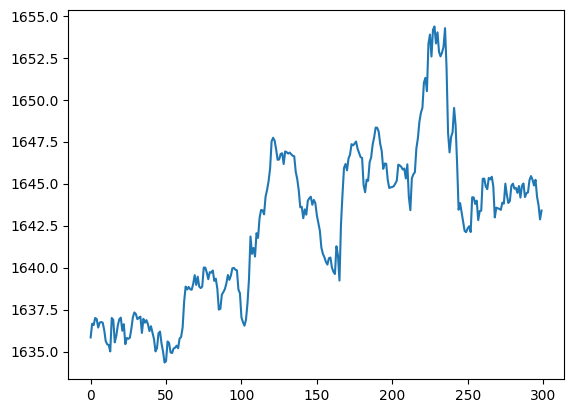

avg OPEN : 1641.0734, avg High : 1642.5339666666666, avg LOW : 1641.8561666666667, avg CLOSE : 1641.843




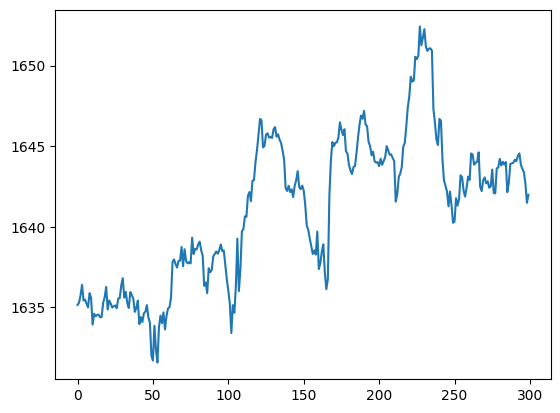

time vs open


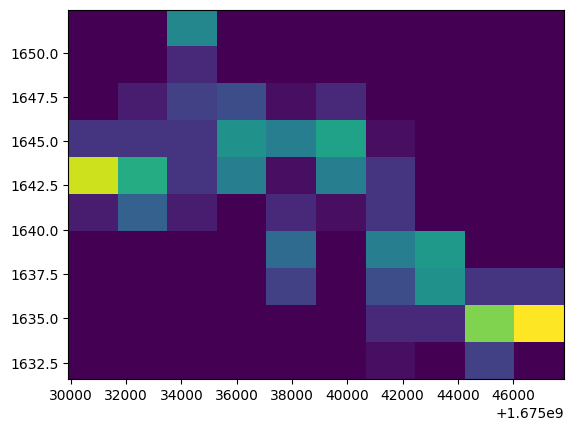

time vs volume


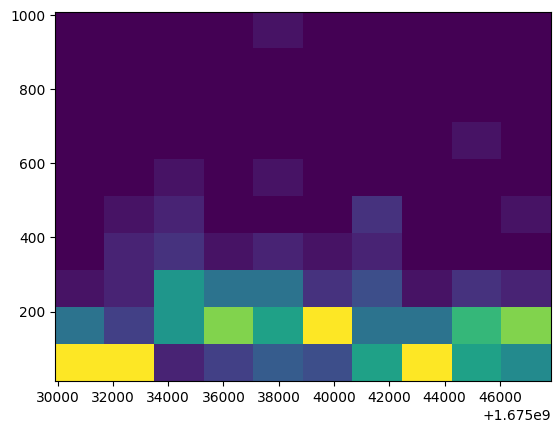

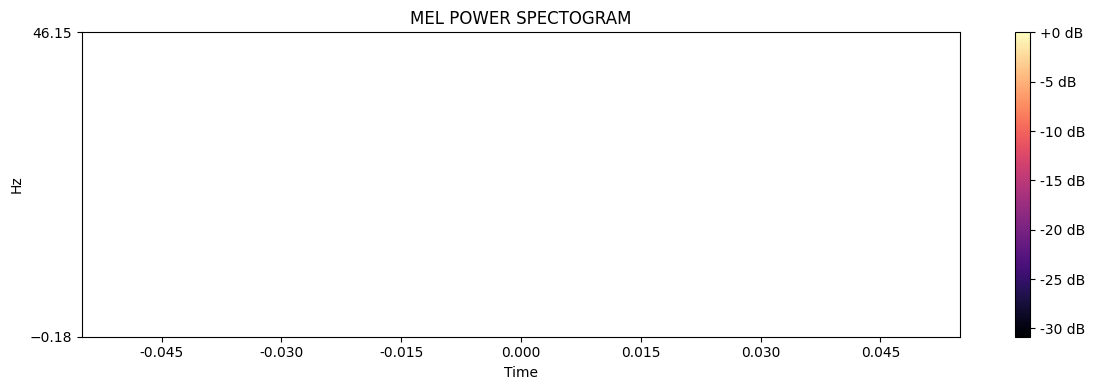

predicted VOLUME is [213.72563109]
data energy [11320789.30200457   479556.9720477 ]
predicted open energy [80989595.80775717]
predicted low energy [3.65561434e+08]
predicted high energy [3.65817978e+08]
predicted volume energy [6393618.70397469]
predicted open root mean squared error [[397.72201889]]
predicted high root mean squared error [[844.58315661]]
predicted low root mean squared error [[844.80394389]]
predicted volume root mean squared error [[842.96216909]]


open predictions


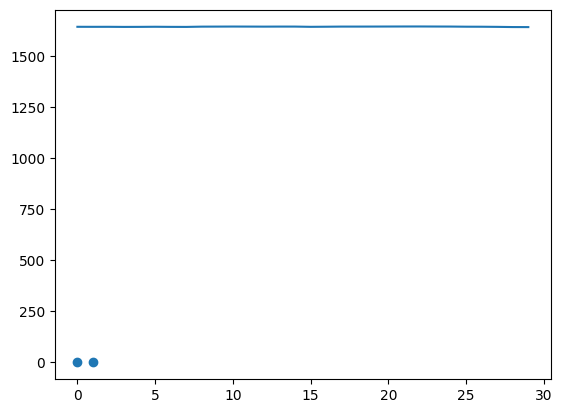

low predictions


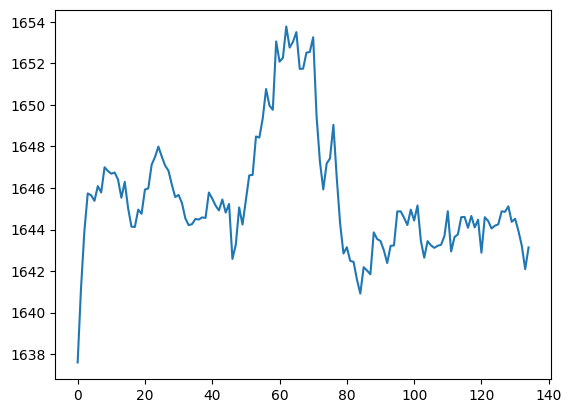

high predctions


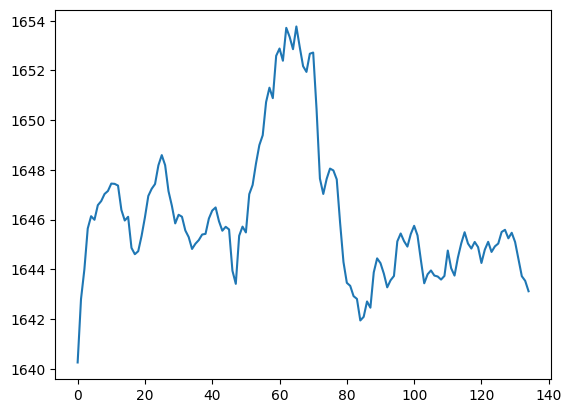

volume predictions


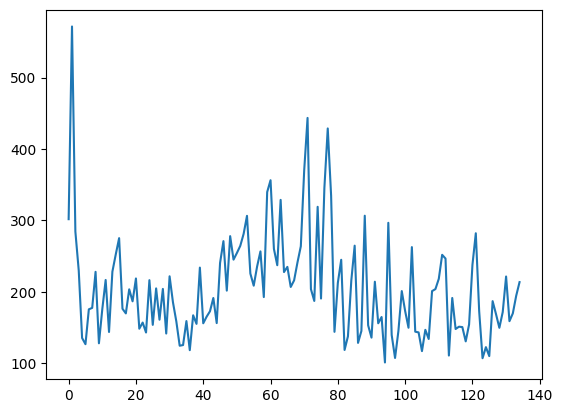

Predicted Crypto data
Use the slider to Adjust and Zoom


predicted market cap per signal 299    277295.39984
Name: volume, dtype: float64
low predictions


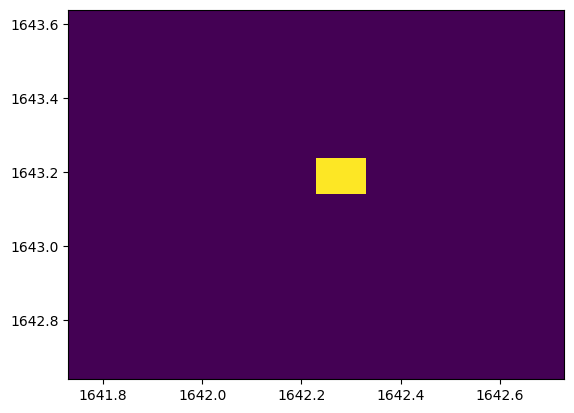

high predictions


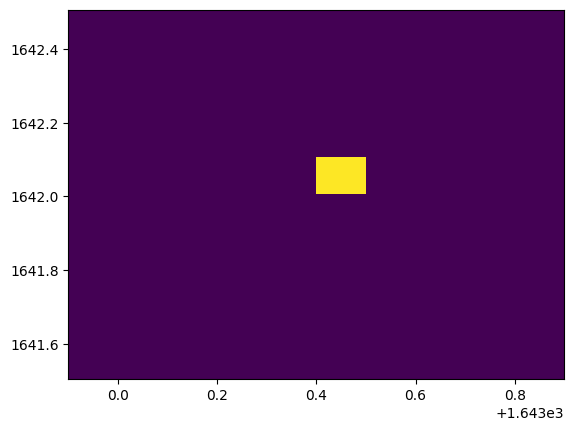

open predictions


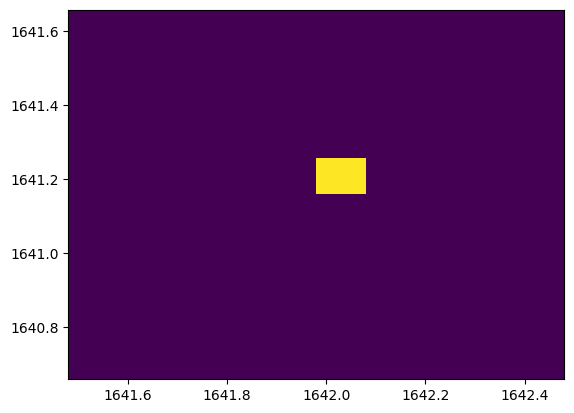

accuracy 0.9654578717168498
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] TEST: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29

BTC high data


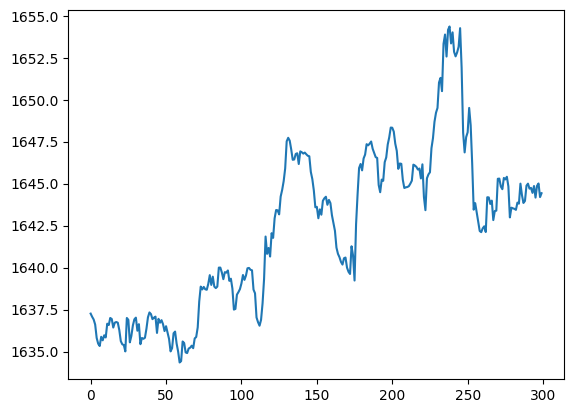

avg OPEN : 1640.8057333333331, avg High : 1642.2581666666667, avg LOW : 1641.5854666666664, avg CLOSE : 1641.5699666666667




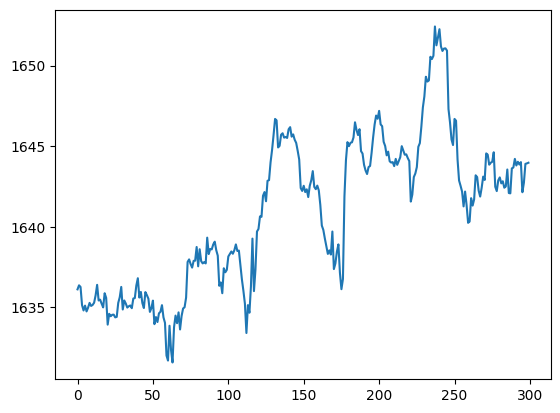

time vs open


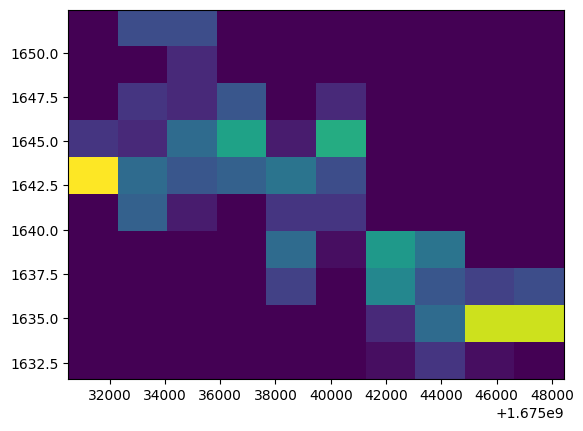

time vs volume


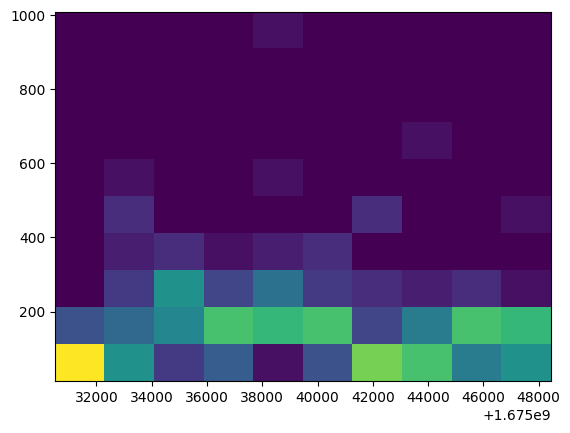

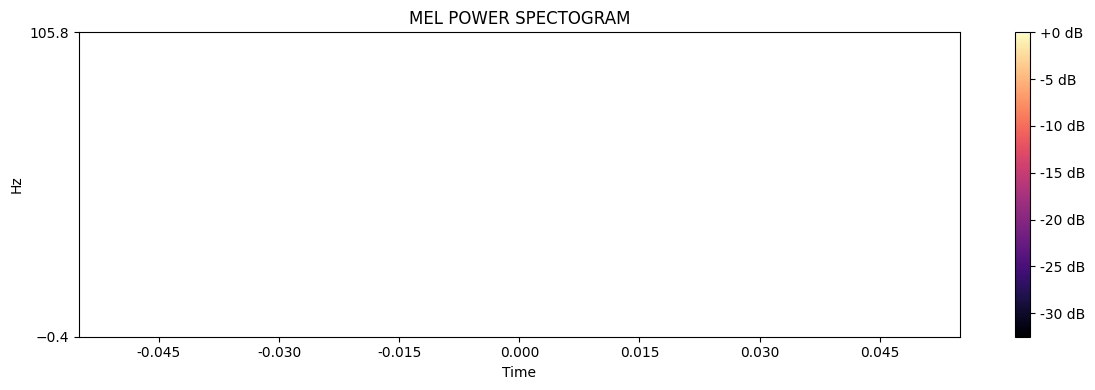

predicted VOLUME is [67.48255044]
data energy [11328509.22808176   376084.77933444]
predicted open energy [81000362.82144305]
predicted low energy [3.65452527e+08]
predicted high energy [3.65684258e+08]
predicted volume energy [5160418.69571055]
predicted open root mean squared error [[397.74845523]]
predicted high root mean squared error [[844.3946046]]
predicted low root mean squared error [[844.62256145]]
predicted volume root mean squared error [[842.821879]]


open predictions


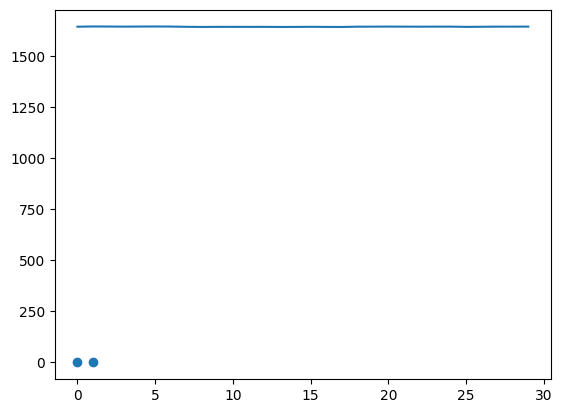

low predictions


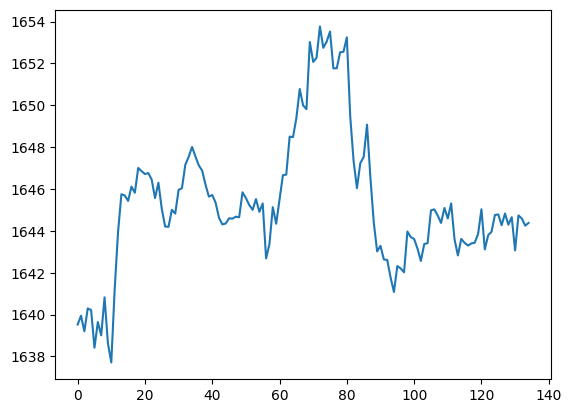

high predctions


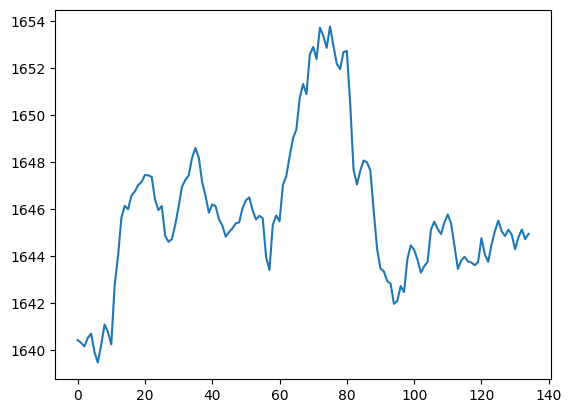

volume predictions


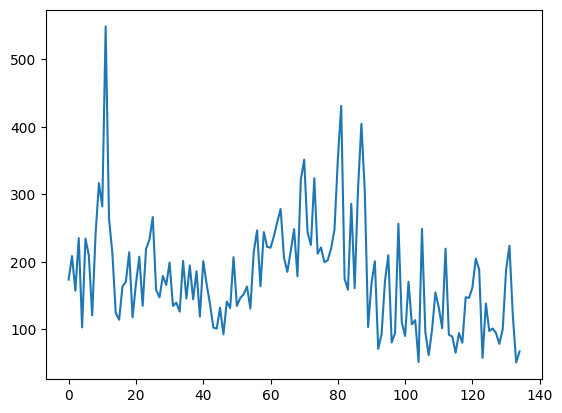

Predicted Crypto data
Use the slider to Adjust and Zoom


predicted market cap per signal 299    54202.065817
Name: volume, dtype: float64
low predictions


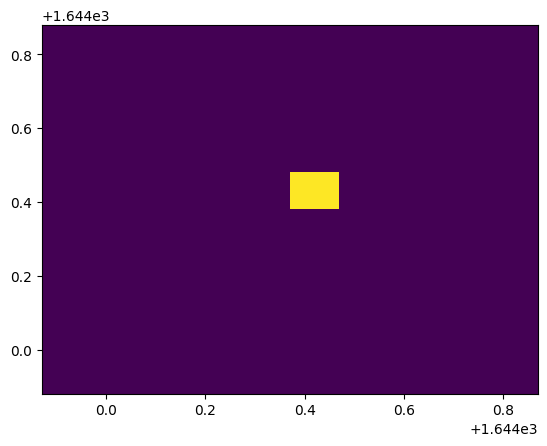

high predictions


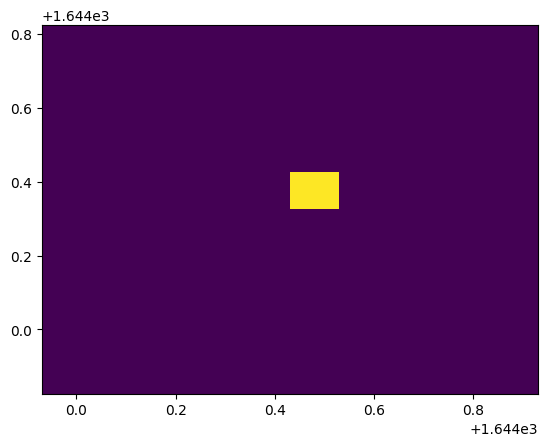

open predictions


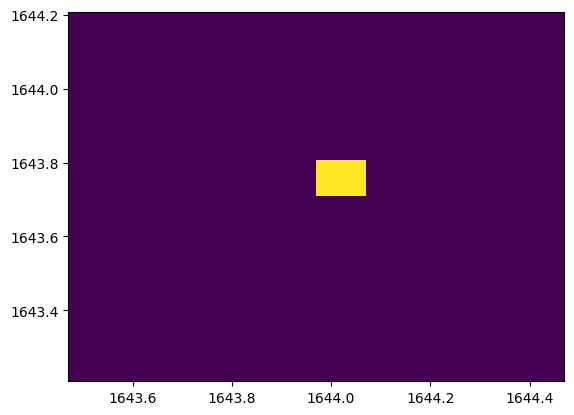

accuracy 0.9715319578898635
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] TEST: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29

BTC high data


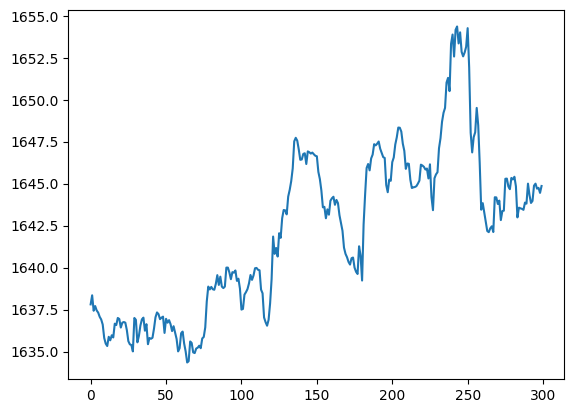

avg OPEN : 1640.6982666666665, avg High : 1642.1452666666669, avg LOW : 1641.4737, avg CLOSE : 1641.4589666666666




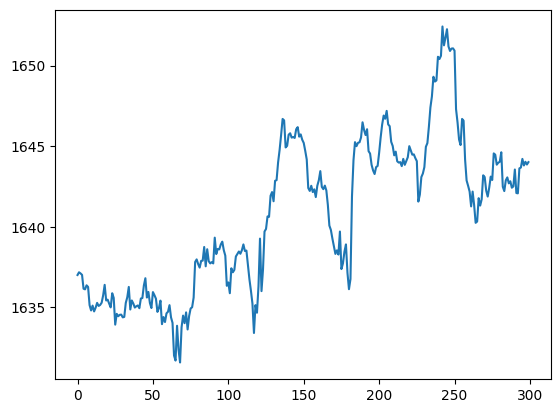

time vs open


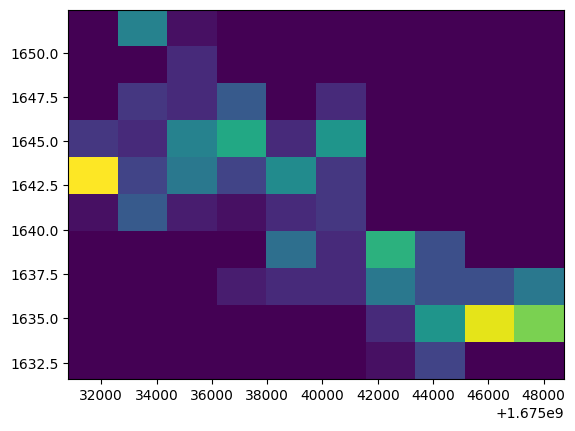

time vs volume


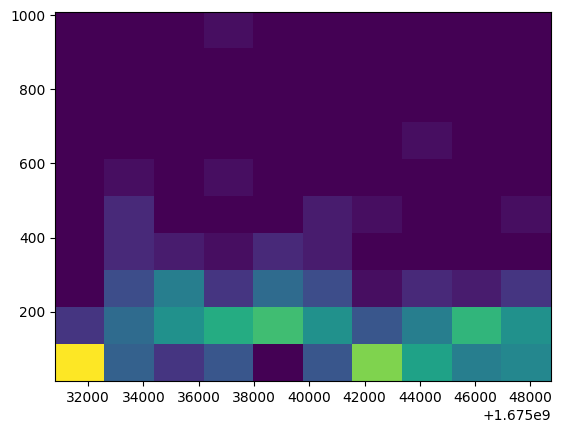

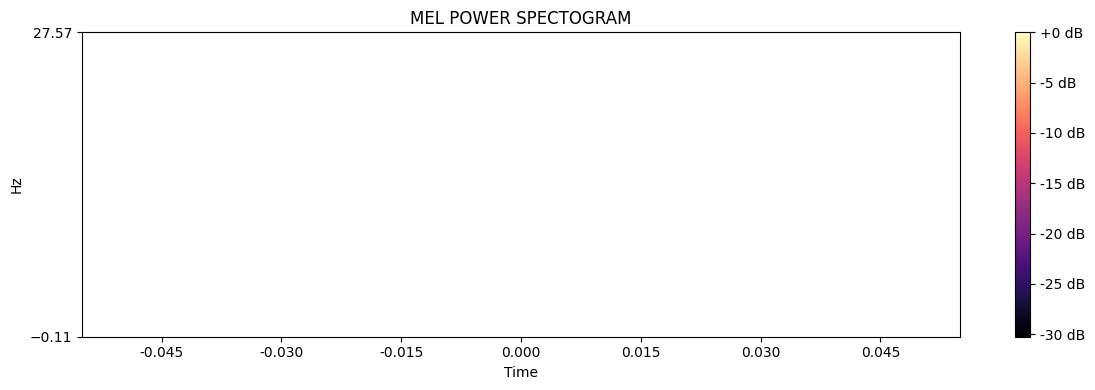

predicted VOLUME is [24.70545054]
data energy [11499509.39550467   869654.35100117]
predicted open energy [80979051.68478446]
predicted low energy [3.65447284e+08]
predicted high energy [3.65646143e+08]
predicted volume energy [3733690.18900322]
predicted open root mean squared error [[397.69612812]]
predicted high root mean squared error [[844.31500068]]
predicted low root mean squared error [[844.54660464]]
predicted volume root mean squared error [[842.79507428]]


open predictions


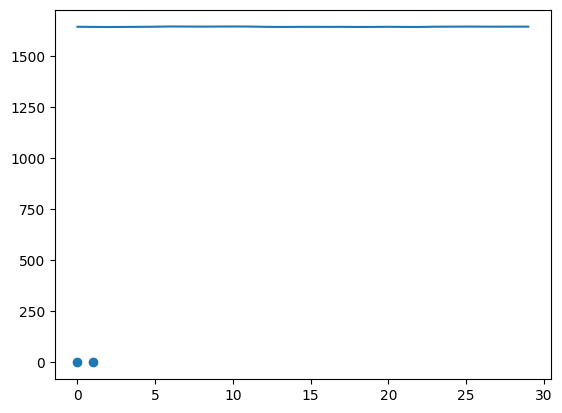

low predictions


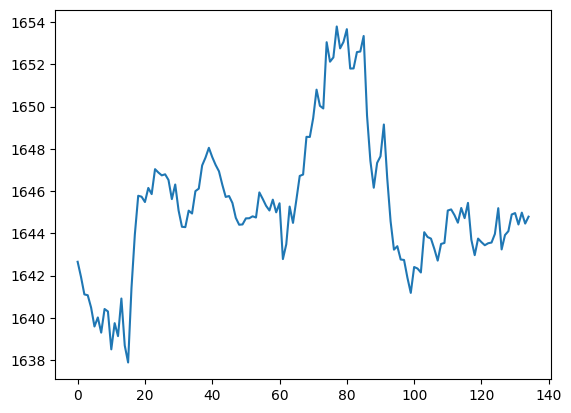

high predctions


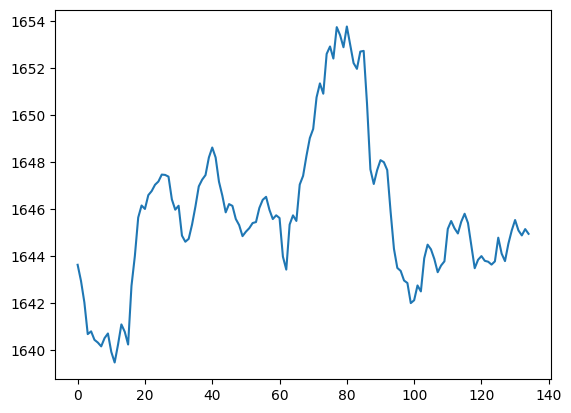

volume predictions


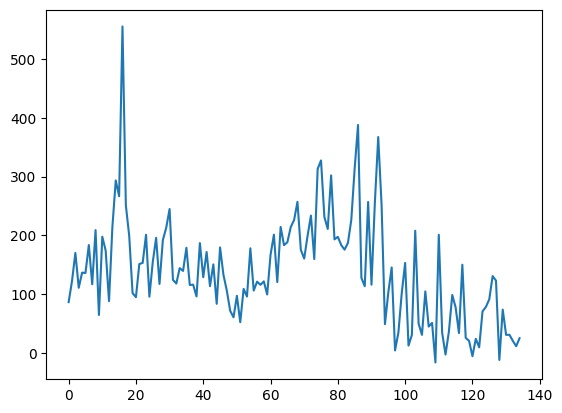

Predicted Crypto data
Use the slider to Adjust and Zoom


predicted market cap per signal 299    74465.4121
Name: volume, dtype: float64
low predictions


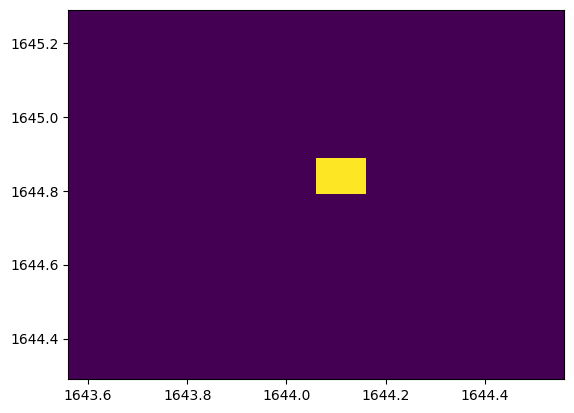

high predictions


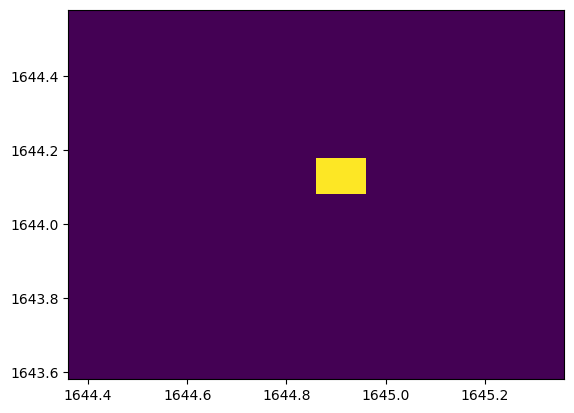

open predictions


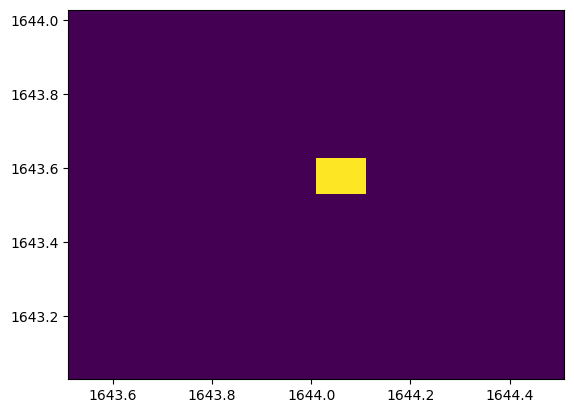

accuracy 0.9671910964163131
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] TEST: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29

In [ ]:
import os
import pandas as pd 
import librosa
currency = input('enter currency pairing: ')

def pred_eth():
    
    iteration=1
    print('Analyzing and predicting cryptocurrency. \n\n\n\n')
    while True:
        data = history(currency)
        data.to_csv('currency_high.csv')
        read_data()
#         print(data.shape)
#         data.head()
#         data.describe()
#         data.corr()
#         data[['low']].plot.bar()
        high = data[['high']]
#         plt.plot(high)
#         plt.legend(['high','low']) 
#         plt.savefig('images/high_low.png')
        y = data['high']
        y1=y
        X = data.drop(['high'],axis=1) 
        mini = MinMaxScaler() 
        X = mini.fit_transform(X) 

        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.6) 
        reg = LinearRegression(normalize=True,n_jobs=-1)
        reg.fit(X_train,y_train)
        tscv = TimeSeriesSplit(n_splits=5)
#         print(tscv)  
        TimeSeriesSplit(max_train_size=None, n_splits=4)
        for train_index, test_index in tscv.split(X):
            print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
    #     from sklearn.externals import joblib
    #     joblib.dump(reg, 'models/tscv_1.pkl')
        bata =  data
#         bata.shape
        date = bata['time'] 
#         print(bata.tail())
#         print(X.shape)
        future_x = X 
        X = X[-1:] 
        bata = bata
        date = bata['time'] 
        date = date.tail()
        bata = bata.tail() 
        date = bata['time']
        y = reg.predict(future_x) 
        print('accuracy {}'.format(reg.score(X_test,y_test)))
        y_df = pd.DataFrame(y) 
        y_df.to_csv('pred.csv')
#         y
#         plt.plot(y) 
#         plt.show()
#         plt.savefig('images/PREDICTED_HIGH.png')    
#         plt.close()
        print('current {} balance {} \n'.format(currency,current_balance))
        print('predicted high {} portfolio balance {} \n'.format(currency,float(y[-1:])*float(auth_client_currency)-1.25))

#         order_book = auth_client.get_product_order_book('ETH-USD')
#         print(order_book)
        print('predicted high {}: {} \n'.format(currency,y[-1:]))
#         latestBlock()
#         currency = currency[:3]
        if float(y[-1:]) < float(y1[-1:]) and float(y[-1:]) == float(y1[-1:]):
            print('buying {}'.format(currency))
            print('predicted price', y[-1:])
            print('actual price', y1[-1:])
#             buy = client.buy('acct_id', amount=amount, currency=currency)
#             fills1 = pd.DataFrame(client.get_buy('acct_id', buy.id))   
            latestBlock() 
            time.sleep(300)

        if float(y[-1:]) > float(y1[-1:]) and float(y[-1:]) == float(y1[-1:]):
            print('selling {}'.format(currency))
            print('predicted price', y[-1:])
            print('actual price', y1[-1:])
#             sell = client.sell('acct_id', amount=amount, currency=currency)
#             fills1 = pd.DataFrame(client.get_sell('acct_id', sell.id)) 
            latestBlock()
            time.sleep(300)

#             time.sleep(10)

        if float(y1[-1:]) < float(y1[-2:-1]*.1):
            print('buying {}'.format(currency))
            print('actual price', y1[-1:])
            print('predicted price', y[-1:])
#             buy = client.buy('acct_id', amount=amount, currency=currency)
#             fills1 = pd.DataFrame(client.get_buy('acct_id', buy.id))   
            latestBlock()
            time.sleep(30)

        if float(y1[-1:]) > float(y1[-2:-1])*.3:
            print('selling {}'.format(currency))
            print('actual price', y1[-1:])
            print('predicted price', y[-1:])
#             sell = client.sell('acct_id', amount=amount, currency=currency)
#             fills1 = pd.DataFrame(client.get_sell('acct_id', sell.id)) 
            latestBlock()
            time.sleep(30)
            
        if float(y1[-1:]) < float(y1[-2:-1])-5.00:
            print('buying {}'.format(currency))
            print('actual price', y1[-1:])
            print('predicted price', y[-1:])
#             buy = client.buy('acct_id', amount=amount, currency=currency)
#             fills1 = pd.DataFrame(client.get_buy('acct_id', buy.id))   
            latestBlock()
            time.sleep(300)
            
            
        if float(y1[-1:]) > float(y1[-2:-1])+5.00:
            print('selling {}'.format(currency))
            print('actual price', y1[-1:])
            print('predicted price', y[-1:])
#             sell = client.sell('acct_id', amount=amount, currency=currency)
#             fills1 = pd.DataFrame(client.get_sell('acct_id', sell.id)) 
            latestBlock()
            time.sleep(300)
            

    
        if float(y1[-1:]) == float(y1[-2:-1]):
            print('holding {}'.format(currency))
            print(y[-1:])
            print(y1[-1:])
            latestBlock()
            
        if float(y[-1:]) == float(y1[-1:]):
            print('holding {}'.format(currency))
            print(y[-1:])
            print(y1[-1:])
            latestBlock()
            
                        
    
    time.sleep(30)
    iteration += 1     
    return bata[-1:]
pred_eth()